In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [16]:
ca = gpd.read_file('../processed/chicago_community_areas.geojson')

In [18]:
ca.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   community                 77 non-null     object  
 1   area_num_1                77 non-null     object  
 2   GRR                       77 non-null     int32   
 3   L                         77 non-null     int32   
 4   NL                        77 non-null     int32   
 5   U                         77 non-null     int32   
 6   total                     77 non-null     int32   
 7   flag                      77 non-null     bool    
 8   lead_plus_suspected       77 non-null     int32   
 9   requires_replacement      77 non-null     int32   
 10  pct_lead                  77 non-null     float64 
 11  pct_grr                   77 non-null     float64 
 12  pct_suspected_lead        77 non-null     float64 
 13  pct_lead_plus_suspected   77 non-null     fl

# Correlations between pct lead and demographics

In [2]:
# load tract-level df
df = gpd.read_file('../processed/chicago_tracts_filled.geojson')

In [3]:
df.head(2)

,geoid,pct_poverty,median_household_income,pct_hispanic,pct_black_nonhispanic,pct_white_nonhispanic,pct_asian_nonhispanic,pct_minority,GRR,L,...,flag,lead_plus_suspected,requires_replacement,pct_lead,pct_grr,pct_suspected_lead,pct_lead_plus_suspected,pct_requires_replacement,pct_not_lead,geometry
0,17031030101,17.5,49132.0,9.1,20.2,47.1,17.8,52.9,0.0,5.0,...,0.0,33.0,33.0,8.1,0.0,45.2,53.2,53.2,46.8,"MULTIPOLYGON (((-87.6543 41.99238, -87.65442 4..."
1,17031030701,19.7,51625.0,12.9,33.2,45.7,5.6,54.3,0.0,3.0,...,0.0,17.0,17.0,7.0,0.0,32.6,39.5,39.5,60.5,"MULTIPOLYGON (((-87.66006 41.98326, -87.66003 ..."


In [6]:
df.columns

Index(['geoid', 'pct_poverty', 'median_household_income', 'pct_hispanic',
       'pct_black_nonhispanic', 'pct_white_nonhispanic',
       'pct_asian_nonhispanic', 'pct_minority', 'GRR', 'L', 'NL', 'U', 'total',
       'flag', 'lead_plus_suspected', 'requires_replacement', 'pct_lead',
       'pct_grr', 'pct_suspected_lead', 'pct_lead_plus_suspected',
       'pct_requires_replacement', 'pct_not_lead', 'geometry'],
      dtype='object')

Tracts by pct black and pct suspected lead

<Axes: xlabel='pct_black_nonhispanic', ylabel='pct_lead'>

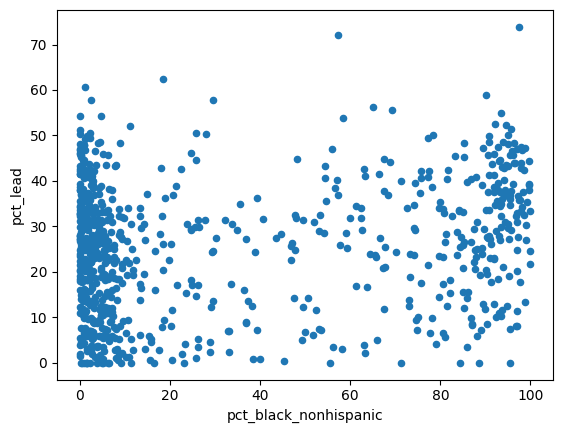

In [7]:
df.plot.scatter(x='pct_black_nonhispanic', y='pct_lead')

<Axes: xlabel='pct_black_nonhispanic', ylabel='pct_not_lead'>

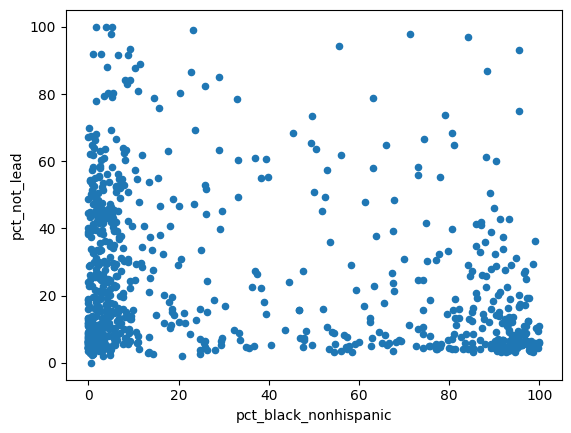

In [5]:
df.plot.scatter(x='pct_black_nonhispanic', y='pct_not_lead')

<Axes: xlabel='pct_black_nonhispanic', ylabel='pct_suspected_lead'>

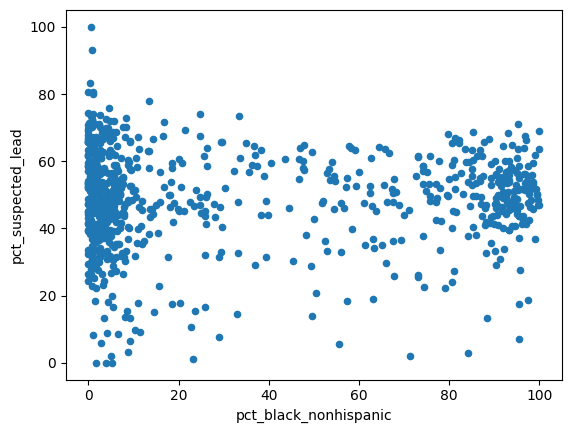

In [9]:
df.plot.scatter(x='pct_black_nonhispanic', y='pct_suspected_lead')

<Axes: xlabel='pct_black_nonhispanic', ylabel='median_household_income'>

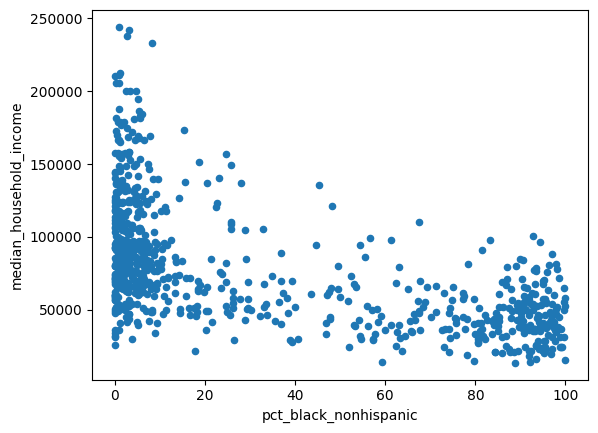

In [8]:
df.plot.scatter(x='pct_black_nonhispanic', y='median_household_income')

Tracts by pct latino

<Axes: xlabel='pct_hispanic', ylabel='pct_lead'>

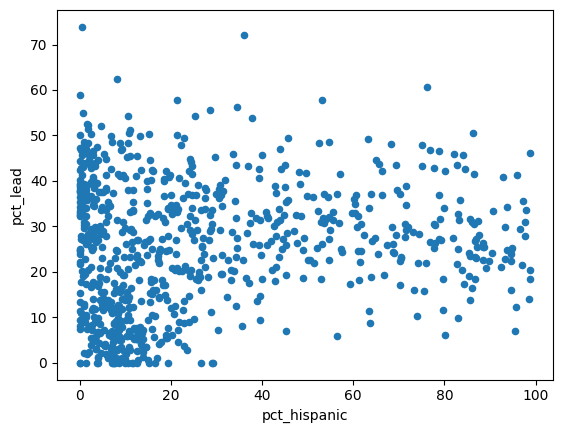

In [10]:
df.plot.scatter(x='pct_hispanic', y='pct_lead')

<Axes: xlabel='pct_hispanic', ylabel='pct_not_lead'>

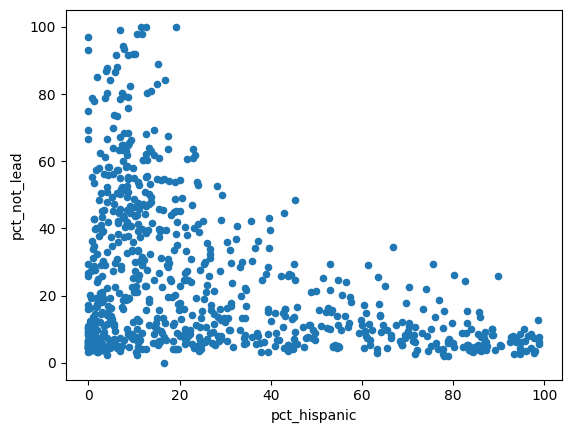

In [11]:
df.plot.scatter(x='pct_hispanic', y='pct_not_lead')

<Axes: xlabel='pct_hispanic', ylabel='pct_suspected_lead'>

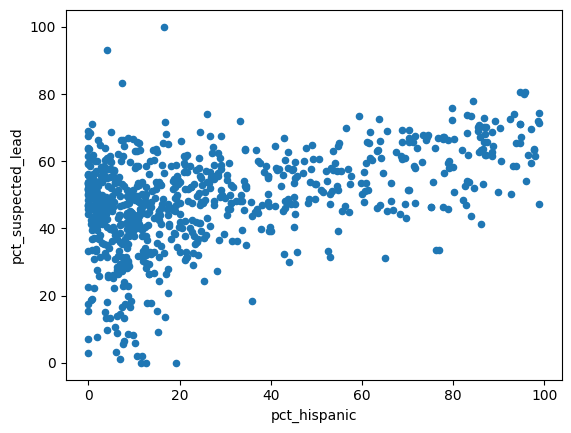

In [12]:
df.plot.scatter(x='pct_hispanic', y='pct_suspected_lead')

White tracts

<Axes: xlabel='pct_white_nonhispanic', ylabel='pct_lead'>

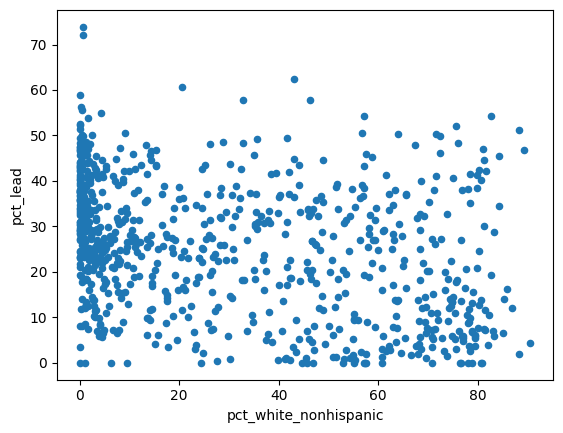

In [13]:
df.plot.scatter(x='pct_white_nonhispanic', y='pct_lead')

<Axes: xlabel='pct_white_nonhispanic', ylabel='pct_not_lead'>

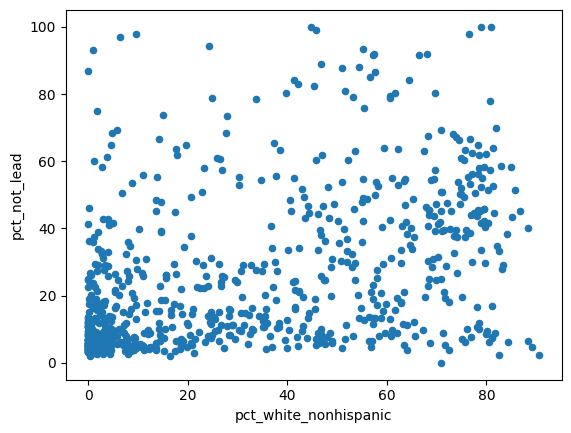

In [14]:
df.plot.scatter(x='pct_white_nonhispanic', y='pct_not_lead')

<Axes: xlabel='pct_white_nonhispanic', ylabel='pct_suspected_lead'>

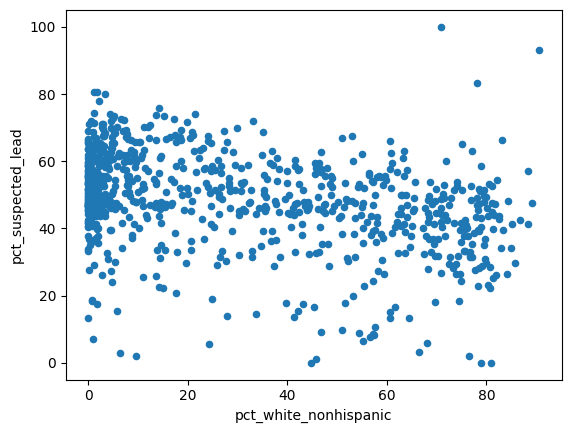

In [15]:
df.plot.scatter(x='pct_white_nonhispanic', y='pct_suspected_lead')

# Majority race by tract categorizations

In [21]:
def find_majority_race(row):
    if row['pct_hispanic'] > 50:
        return 'hispanic'
    elif row['pct_black_nonhispanic'] > 50:
        return 'black'
    elif row['pct_white_nonhispanic'] > 50:
        return 'white'
    elif row['pct_asian_nonhispanic'] > 50:
        return 'asian'
    else:
        return 'no_majority'

df['majority_race'] = df.apply(find_majority_race, axis=1)

In [23]:
df.head(2)

,geoid,pct_poverty,median_household_income,pct_hispanic,pct_black_nonhispanic,pct_white_nonhispanic,pct_asian_nonhispanic,pct_minority,GRR,L,...,lead_plus_suspected,requires_replacement,pct_lead,pct_grr,pct_suspected_lead,pct_lead_plus_suspected,pct_requires_replacement,pct_not_lead,geometry,majority_race
0,17031030101,17.5,49132.0,9.1,20.2,47.1,17.8,52.9,0.0,5.0,...,33.0,33.0,8.1,0.0,45.2,53.2,53.2,46.8,"MULTIPOLYGON (((-87.6543 41.99238, -87.65442 4...",no_majority
1,17031030701,19.7,51625.0,12.9,33.2,45.7,5.6,54.3,0.0,3.0,...,17.0,17.0,7.0,0.0,32.6,39.5,39.5,60.5,"MULTIPOLYGON (((-87.66006 41.98326, -87.66003 ...",no_majority


In [25]:
df.groupby('majority_race')[['lead_plus_suspected', 'requires_replacement','GRR','L','NL','U','total']].sum()

,lead_plus_suspected,requires_replacement,GRR,L,NL,U,total
majority_race,,,,,,,
asian,2980.0,3073.0,93.0,805.0,1632.0,2175.0,4705.0
black,136018.0,141142.0,5124.0,56512.0,17736.0,79506.0,158878.0
hispanic,111664.0,113573.0,1909.0,37079.0,10456.0,74585.0,124029.0
no_majority,55702.0,57268.0,1566.0,19985.0,14221.0,35717.0,71489.0
white,95544.0,97377.0,1833.0,36479.0,34928.0,59065.0,132305.0


In [27]:
df.groupby('majority_race').size().reset_index()

,majority_race,0
0,asian,9
1,black,263
2,hispanic,168
3,no_majority,124
4,white,239


In [33]:
df[df['majority_race'] == 'asian']['geoid'].to_list()

['17031600700',
 '17031350100',
 '17031600600',
 '17031340300',
 '17031600400',
 '17031841100',
 '17031840200',
 '17031840100',
 '17031340400']

In [32]:
df[df['majority_race'] == 'asian'].explore(
    column="pct_requires_replacement",  # make choropleth based on "BoroName" column
    tooltip="geoid",  # show "BoroName" value in tooltip (on hover)
    popup=True,  # show all values in popup (on click)
    tiles="CartoDB positron",  # use "CartoDB positron" tiles
    cmap="Reds",  # use "Set1" matplotlib colormap
    style_kwds=dict(color="black"),  # use black outline
)